In [30]:
import pickle
import numpy as np
import matplotlib.pylab as plt
import uproot
from sklearn.metrics import confusion_matrix

In [31]:
file = uproot.open('/home/andy/12360.root')
file2 = uproot.open('/home/andy/12362.root')

In [32]:
cut_model = pickle.load((open('cut_model.sav','rb')))

In [33]:
Eloss_keys = file['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss = file['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss += file['Stoch_Reco'][Eloss_keys[i]].array()
Eloss = Eloss/len(Eloss_keys)

Eloss_keys = file2['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss2 = file2['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss2 += file2['Stoch_Reco'][Eloss_keys[i]].array()
Eloss2 = Eloss2/len(Eloss_keys)

Eloss = np.append(Eloss,Eloss2)

In [34]:
cut = []
for i in file['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file['IT73AnalysisInIceQualityCuts'][i].array())
cut2 = list(zip(cut))
for i in range(len(cut2)):
    if i == 0:
        final_cut = cut2[i][0]
    else:
        final_cut = [j and k for j,k in zip(final_cut,cut2[i][0])]
        
cut = []
for i in file2['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file2['IT73AnalysisInIceQualityCuts'][i].array())
cut2 = list(zip(cut))
for i in range(len(cut2)):
    if i == 0:
        final_cut2 = cut2[i][0]
    else:
        final_cut2 = [j and k for j,k in zip(final_cut,cut2[i][0])]
        
in_ice_cuts = np.append(final_cut,final_cut2)

In [35]:
Xmax1 = file['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file['MCPrimaryInfo']['longNumCharged'].array()
Depth1 = file['MCPrimaryInfo']['longDepth'].array()
chi2_1 = file['CurvatureOnlyParams']['chi2_time'].array()
red1 = file['MCPrimaryInfo']['ghRedChiSqr'].array()
mass1 = [1 for i in range(len(red1))]
        
Xmax2 = file2['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file2['MCPrimaryInfo']['longNumCharged'].array()
Depth2 = file2['MCPrimaryInfo']['longDepth'].array()
chi2_2 = file2['CurvatureOnlyParams']['chi2_time'].array()
red2 = file2['MCPrimaryInfo']['ghRedChiSqr'].array()
mass2 = [4 for i in range(len(red2))]

In [36]:
S125_1 = file['LaputopParams']['s125'].array()
S125_2 = file2['LaputopParams']['s125'].array()
A1 = file['CurvatureOnlyParams']['A'].array()
A2 = file2['CurvatureOnlyParams']['A'].array()
D1 = file['CurvatureOnlyParams']['D'].array()
D2 = file2['CurvatureOnlyParams']['D'].array()
N1 = file['CurvatureOnlyParams']['N'].array()
N2 = file2['CurvatureOnlyParams']['N'].array()
beta1 = file['LaputopParams']['beta'].array()
beta2 = file2['LaputopParams']['beta'].array()
zenith1 = file['Laputop']['zenith'].array()
zenith2 = file2['Laputop']['zenith'].array()
energy1 = file['MCPrimary']['energy'].array()
energy2 = file2['MCPrimary']['energy'].array()
stoch1_1 = file['Stoch_Reco']['n_he_stoch'].array()
stoch1_2 = file2['Stoch_Reco']['n_he_stoch'].array()
stoch2_1 = file['Stoch_Reco2']['n_he_stoch'].array()
stoch2_2 = file2['Stoch_Reco2']['n_he_stoch'].array()

slc_charge1 = file['LaputopSLCPE']['charge'].array()
slc_charge2 = file2['LaputopSLCPE']['charge'].array()

slc_charge1 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge1]
slc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge2]

hlc_charge1 = file['LaputopHLCPE']['charge'].array()
hlc_charge2 = file2['LaputopHLCPE']['charge'].array()

hlc_charge1 = [np.sum(i[np.isnan(i) ==False]) for i in hlc_charge1]
hlc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in hlc_charge2]

Qtot1 = [i+j for i,j in zip(slc_charge1,hlc_charge1)]
Qtot2 = [i+j for i,j in zip(slc_charge2,hlc_charge2)]

In [37]:
chi2 = np.append(chi2_1,chi2_2)
A = np.append(A1,A2)[np.isfinite(chi2)]
D = np.append(D1,D2)[np.isfinite(chi2)]
N = np.append(N1,N2)[np.isfinite(chi2)]
S125 = np.log10(np.append(S125_1,S125_2))[np.isfinite(chi2)]
beta = np.log10(np.append(beta1,beta2))[np.isfinite(chi2)]
red = np.append(red1,red2)[np.isfinite(chi2)]
zenith = np.cos(np.append(zenith1,zenith2))[np.isfinite(chi2)]
Xmax = np.append(Xmax1,Xmax2)[np.isfinite(chi2)]
red = np.append(red1,red2)[np.isfinite(chi2)]
mass = np.append(mass1,mass2)[np.isfinite(chi2)]
slc_charge = np.append(slc_charge1,slc_charge2)[np.isfinite(chi2)]
hlc_charge = np.append(hlc_charge1,hlc_charge2)[np.isfinite(chi2)]
qtot = np.append(Qtot1,Qtot2)[np.isfinite(chi2)]
stoch1 = np.append(stoch1_1,stoch1_2)[np.isfinite(chi2)]
stoch2 = np.append(stoch2_1,stoch2_2)[np.isfinite(chi2)]
for i in range(len(stoch1)):
    if not in_ice_cuts[i]:
        stoch1[i] = 0
        stoch2[i] = 0

energy_loss = Eloss[np.isfinite(chi2)]
for i in range(len(energy_loss)):
    if ((energy_loss[i] != 0 and in_ice_cuts[i]) and np.isfinite(energy_loss[i])) and not np.isnan(energy_loss[i]):
        energy_loss[i] = np.log10(abs(energy_loss[i]))
    else:
        energy_loss[i] = 0
        

energy = np.log10(np.append(energy1,energy2))[np.isfinite(chi2)]
in_ice_cuts = in_ice_cuts[np.isfinite(chi2)]
chi2 = np.append(chi2_1,chi2_2)[np.isfinite(chi2)]

In [38]:
from sklearn.preprocessing import scale
from keras.models import load_model
input_variable2_old = np.array(list(zip(slc_charge,A,energy_loss,beta,stoch1,S125)))[in_ice_cuts]
output_new_old = np.array(mass)[in_ice_cuts]
energy_new = np.array(energy)[in_ice_cuts]

In [39]:
index = range(len(energy_new))
array_split = np.array_split(sorted(list(zip(index,energy_new)),key=lambda x:x[1]),20)

In [40]:
model = load_model('Mass_model_best.h5')
x = []
y_proton = []
y_iron = []
for i in array_split:
    index1 = []
    for k in list(zip(*i))[0]:
        index1.append(int(k))
    energy = list(zip(*i))[1]
    mass1 = output_new_old[index1]
    data = input_variable2_old[index1]
    #prediction1 = prediction_model(data)
    prediction1 = model.predict(data)
    
    for j in range(len(prediction1)):
        if prediction1[j] < 2.5:
            prediction1[j] = 1
        else:
            prediction1[j] = 4
    prediction1 = np.hstack(prediction1)
    cm = confusion_matrix(mass1,prediction1)
    x.append((max(energy)+min(energy))/2)
    y_proton.append(cm[0][0]/np.sum(cm[0]))
    y_iron.append(cm[1][1]/np.sum(cm[1]))

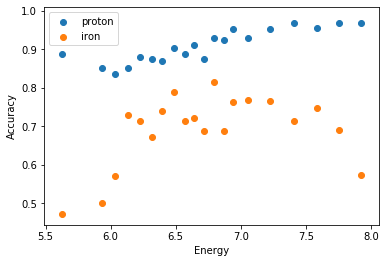

In [41]:
plt.scatter(x,y_proton,label='proton')
plt.scatter(x,y_iron,label='iron')
plt.xlabel('Energy')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Energy_accuracy')

In [42]:
print(y_iron,np.mean(y_iron))

[0.4722222222222222, 0.5, 0.5714285714285714, 0.7294117647058823, 0.7127659574468085, 0.6717948717948717, 0.7399103139013453, 0.788659793814433, 0.7148936170212766, 0.7215909090909091, 0.6882352941176471, 0.8153846153846154, 0.6868131868131868, 0.7625, 0.768361581920904, 0.7671232876712328, 0.7142857142857143, 0.7486910994764397, 0.6896551724137931, 0.5732484076433121] 0.6918488190576584


In [43]:
print(y_proton,np.mean(y_proton))

[0.886899918633035, 0.8515429524603837, 0.8353552859618717, 0.852343059239611, 0.8796046720575023, 0.8761301989150091, 0.8690807799442897, 0.9041591320072333, 0.8873239436619719, 0.9128113879003559, 0.8761061946902655, 0.9285067873303168, 0.9257602862254025, 0.9537735849056603, 0.9296527159394479, 0.9537465309898242, 0.9675967596759676, 0.9558160504959423, 0.9699179580674567, 0.9693788276465442] 0.9092753513374046


In [44]:
print(np.mean(y_iron)/2+np.mean(y_proton)/2)

0.8005620851975315
